In [1]:
from dataset import SequenceDataset
from model import LSTM, Transformer, DLinear
from main import *
from torch.utils.data import DataLoader
from utils import *
import pandas as pd
import torch
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
fix_seed = 2021
random.seed(fix_seed)
torch.manual_seed(fix_seed)
np.random.seed(fix_seed)

In [3]:
df = pd.read_csv(r'F:\ML_Bootcamp\LTSF-Linear\dataset\test.csv')
df = preprocess_data(df)

In [4]:
target = 'Close'
features = list(df.columns)

In [5]:
train_size = int(len(df)*.8)
train_df = df[:train_size]
test_df = df[train_size:]

In [6]:
scaled_train_df, scalers = scale_df(train_df)
scaled_test_df = apply_scalers(test_df, scalers)
train_dataset = SequenceDataset(scaled_train_df, target, features)
test_dataset = SequenceDataset(scaled_test_df, target, features)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [7]:
learning_rate = 0.001
model = DLinear()
loss_fn = torch.nn.MSELoss()
optimiser = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [8]:
train(n_epochs=5,
              model=model,
              optimiser=optimiser,
              loss_fn=loss_fn,
              train_loader=train_loader)

batch #: 0, current average train loss: 0.22115
batch #: 20, current average train loss: 0.15694
batch #: 40, current average train loss: 0.11672
batch #: 60, current average train loss: 0.08927
batch #: 80, current average train loss: 0.07130
Epoch: 0, train loss: 0.06060
batch #: 0, current average train loss: 0.01442
batch #: 20, current average train loss: 0.01243
batch #: 40, current average train loss: 0.01098
batch #: 60, current average train loss: 0.01033
batch #: 80, current average train loss: 0.00965
Epoch: 1, train loss: 0.00928
batch #: 0, current average train loss: 0.01018
batch #: 20, current average train loss: 0.00654
batch #: 40, current average train loss: 0.00667
batch #: 60, current average train loss: 0.00651
batch #: 80, current average train loss: 0.00629
Epoch: 2, train loss: 0.00614
batch #: 0, current average train loss: 0.00690
batch #: 20, current average train loss: 0.00548
batch #: 40, current average train loss: 0.00506
batch #: 60, current average tra

In [9]:
preds = test(model, loss_fn, test_loader)

test loss: 0.00307


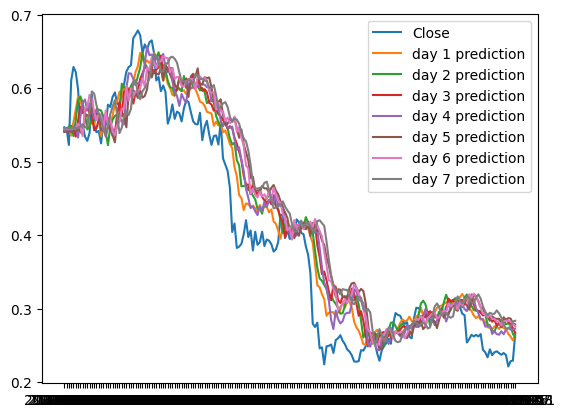

In [10]:
plot_test(scaled_test_df, preds)

In [11]:
new_df = pd.concat((scaled_train_df, scaled_test_df))
dataset = SequenceDataset(new_df, target, features)
loader = DataLoader(dataset, batch_size=8, shuffle=False)
entire_preds = test(model, loss_fn, loader, model_type=0)

test loss: 0.00395


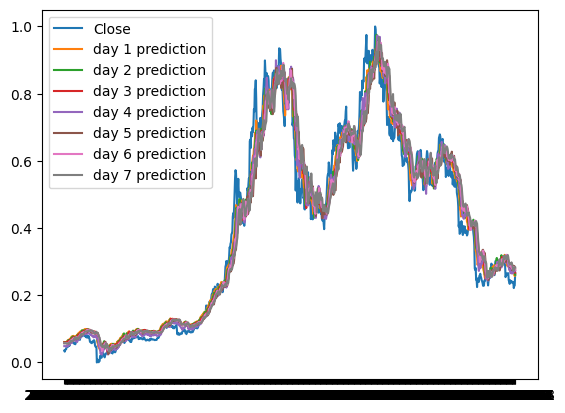

In [12]:
plot_test(new_df, entire_preds)